In [1]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

### Reading in The Data

In [6]:
data = pandas.read_csv("/Users/petermorley/Desktop/DA401_Project/Data/caribbean_hurricanes.csv")
data.head()

,ID,Name,Date,Year,Month,Day,Time,Status,Latitude,Longitude,Maximum.Wind,Minimum.Pressure,Decade
0,AL061851,UNNAMED,1851-10-16,1851,October,16,1200,TS,29.5,-77.5,50.0,NaN,Other
1,AL041851,UNNAMED,1851-08-23,1851,August,23,1200,Cat. 3,28.5,-86.6,100.0,NaN,Other
2,AL041851,UNNAMED,1851-08-20,1851,August,20,600,Cat. 1,20.5,-77.6,70.0,NaN,Other
3,AL051852,UNNAMED,1852-10-10,1852,October,10,0,Cat. 1,30.5,-83.9,80.0,NaN,Other
4,AL051852,UNNAMED,1852-10-07,1852,October,7,1800,Cat. 2,19.5,-84.4,90.0,NaN,Other


### Filtering Out Storms so that Only Category 3 Storms and stronger are included

In [7]:
major_hurr = data[data["Maximum.Wind"] > 95]

### Setting the font size for plots

In [8]:
plt.rcParams.update({'font.size': 12})

### Generating Plots to Look at Hurricane Occurrence Locations 

In [57]:
import contextily
from pointpats import centrography

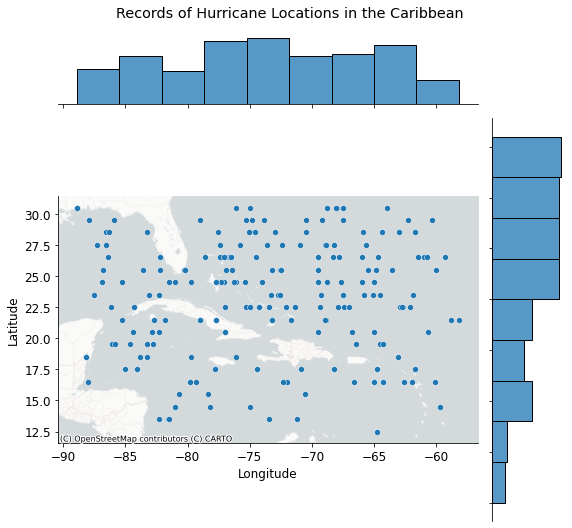

In [58]:
joint_axes = seaborn.jointplot(
    x="Longitude", y="Latitude", data = major_hurr, height = 8, ratio = 5
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
);
joint_axes.fig.suptitle("Records of Hurricane Locations in the Caribbean") 
joint_axes.fig.subplots_adjust(top = 0.93)

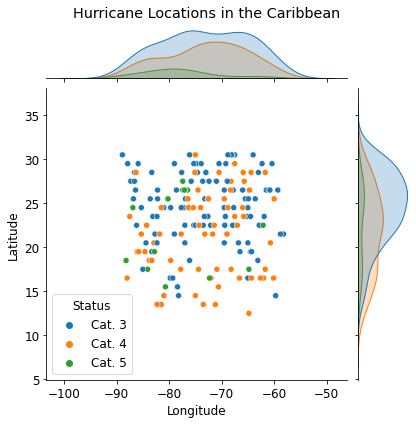

In [59]:
joint_axes = seaborn.jointplot(
    x="Longitude", y="Latitude", data=major_hurr, height = 6, 
    hue = "Status", hue_order = ["Cat. 3", "Cat. 4", "Cat. 5"]
)

joint_axes.fig.suptitle("Hurricane Locations in the Caribbean") 
joint_axes.fig.subplots_adjust(top = 0.93)

### Quadrat Count Analysis to see Randomness

In [23]:
from pointpats import (
    distance_statistics,
    QStatistic,
    random,
    PointPattern,
)

In [60]:
coordinates = major_hurr[["Longitude", "Latitude"]].values

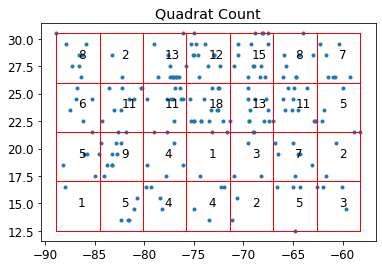

In [61]:
qstat = QStatistic(coordinates, nx = 7, ny = 4)
qstat.plot()

In [64]:
qstat.chi2_pvalue

3.446825421386019e-07